# Tutorial 3 - Boosting Search via Symmetry Breaking, Implied Constraints, Randomisation, and Restarts 
revisit the exact parameters so that restars work) 

**Please do not read untill you fully finish the first 2 tutorials**

Congratulations! you are now level one constraint programmer: you know the basics on how to model a problem, how to display solutions, how to evaluate models, and how to choose a good branching strategy !! **I'm so proud of you!**

In this tutorial we slowly dive into advanced techniques. We also start to use arithmetic constraints and solve optimisation problems.

In [141]:
from config import setup
setup()

## Golomb ruler

Your goal is to place $N$ marks on a ruler, such that no two marks are at the same distance and the total length of the ruler (the position of the last mark) is minimized. 

<div class="row" style="margin-top: 10px">
    <img src="display/images/Golomb_Ruler-4.svg" style="display: block; margin: auto; width: 400px;" />
    <p style="margin: auto; margin-top: 10px; text-align: center;">Golomb ruler of order 4 and length 6. This ruler is both optimal and perfect.</p>
</div>

Golomb ruler can be used in information theory to design error correcting codes or in telecommunications to avoid interferences during radio communications. You can read about it here https://en.wikipedia.org/wiki/Golomb_ruler#:~:targetText=In%20mathematics%2C%20a%20Golomb%20ruler,are%20the%20same%20distance%20apart.&targetText=It%20has%20been%20proven%20that,of%20the%20same%20order%20exists.


**In the rest of this tutorial (except the last part), please use the following parameter with the solve method:**

```
SearchType= 'DepthFirst'
```

Also, in order to control the level of filtering (arc consistency, bound consistency, forward checking, etc), CPoptimizer offers to use a parameter called $DefaultInferenceLevel$  http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.parameters.py.html?highlight=defaultinferencelevel#docplex.cp.parameters.CpoParameters.DefaultInferenceLevel

In the rest of this tutorial, you are required to test all three possibilities


```
DefaultInferenceLevel=Low
DefaultInferenceLevel=Medium
DefaultInferenceLevel=Extended

```

After a while, if you see one that you particularly find efficient (runtime), you can use it for the rest of the tutorial. 


Create a model for the decision version of this problem. That is, given $n$ marks, and a ruler of size $m$, place the $n$ markers such that no two markers are at the same distance. 

You are free to use any constraint you want. However, you must declare and use the minimum amount of constraints (**NOT A SINGLE UNNESSASARY CONSTRAINT**)

Note that for N marks, a ruler of length $2 ^ {N -1}$ can be found (I let you figure out why). 

Write a funtion decision_model(n,m) that builds and returns the correspondant model. 

In [143]:
from docplex.cp.model import *
from docplex.cp.config import get_default
def decision_model(n,m):
    mdl=CpoModel()
    L=mdl.integer_var_list(n,0,m,'L')
    mdl.add(L[0]==0)
    mdl.add(L[n-1]==m)
    for i in range(1,n):
        mdl.add(L[i-1]<L[i])
        
    T=[]
    for i in range(n):
        for j in range(i+1,n):
            T.append(L[j]-L[i])

    mdl.add(all_diff(T))
    return mdl


                

In [144]:
n=4
m=7

Solve the problem for n=4, m=6. Then try different values of (n,m) (but don't waste too much time). 

In [145]:
mdl=decision_model(n,m)
sol=mdl.solve()
allvars = sol.get_all_var_solutions()

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Satisfiability problem - 4 variables, 6 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 12.0 (before), 12.0 (after)
 !  . Memory usage      : 267.0 kB (before), 267.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      7  0.01s                  5  = L_2
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 7
 ! Number of fails        : 2
 ! Total memory usage     : 686.3 kB (646.6 kB CP Optimizer + 39.7 kB Concert)
 ! Time spent in solve    : 0.01s (0.01s engine + 0

You can display to solution using  :  

```
from display import golomb as display_golomb
display_golomb([sol[m] for m in marks])
```

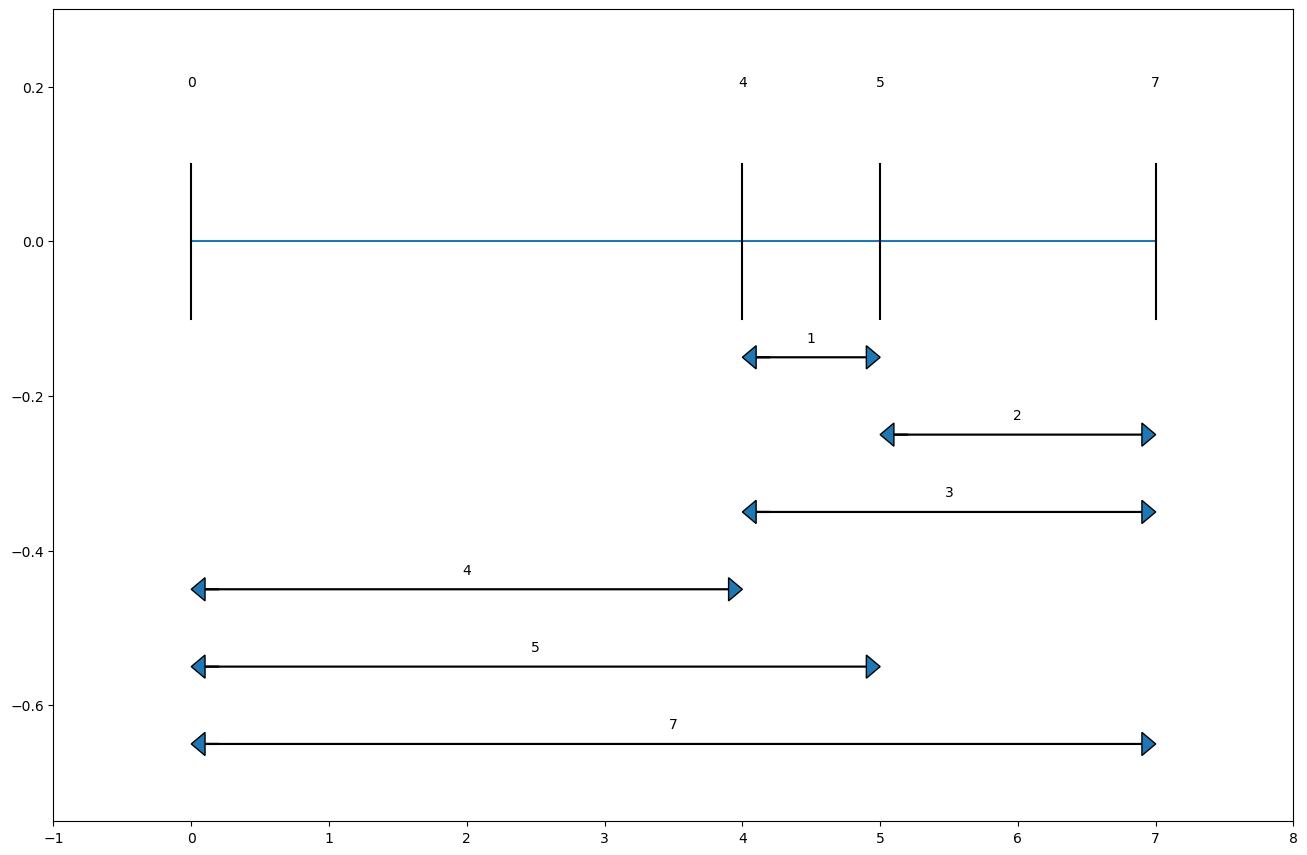

In [146]:
from display import golomb as display_golomb
display_golomb([m.get_value() for m in allvars])
%matplotlib inline

Print and display all the sulutions for (n,m) = (4,6) and (4,7)

In [147]:
lsols = mdl.start_search(SearchType="DepthFirst")
for sol in lsols:
    sol.write()


 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Satisfiability problem - 4 variables, 6 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 12.0 (before), 12.0 (after)
 !  . Memory usage      : 267.0 kB (before), 267.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.01s                  3  = L_2
-------------------------------------------------------------------------------
Model constraints: 6, variables: integer: 4, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------
Variables:
  

Write a funtion  basic_optimisation_model(n) that builds and returns the correspondant model for the
optimisation problem. Note that an optimisation function can be seen as a variable. In order to specify the variable to optimise, we can simply use : 

```
model.add(model.minimize(myvariable))
```

or 

```
model.add(model.maximize(myvariable))
```


In [74]:

def basic_optimization_model(n):
    mdl=CpoModel()
    L=mdl.integer_var_list(n,0,9999,'L')
    mdl.add(L[0]==0)
    for i in range(1,n):
        mdl.add(L[i-1]<L[i])
        
    T=[]
    for i in range(n):
        for j in range(i+1,n):
            T.append(L[j]-L[i])

    mdl.add(all_diff(T))
    mdl.add( L[n-1] - L[n-2] > L[1] )
    mdl.add(minimize(L[n-1]))
    
    return mdl

                

In [78]:
n=4
mdl=basic_optimization_model(n)
s=mdl.solve()
s.write()
lsols = mdl.start_search(SearchType="DepthFirst")
for sol in lsols:
    sol.write()


 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 4 variables, 6 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 53.2 (before), 53.2 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          4                 -
 + New bound is 0
                        0          4                 -
 + New bound is 4
                        0          3                 -
 + New bound is 5
                        2          2        F     1 != L_1
 + New bound is 6
 *             7        5  0.01s               (gap is 14.29%)
 *             6       21  0.01s               (gap is 0.00%)
 ! --------------------------

In [55]:
N_list=[6,7,8,9,10]

Solve the optimisation problem for N=6.. 10  and display the solution

In [79]:
for n in N_list :
    mdl=basic_optimization_model(n)
    lsols = mdl.start_search(SearchType="DepthFirst")
    for sol in lsols:
        sol.write()
     

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 6 variables, 8 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 79.7 (before), 79.7 (after)
 !  . Memory usage      : 299.5 kB (before), 299.5 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          6                 -
 + New bound is 0
 *            23       48  0.01s               (gap is 100.0%)
-------------------------------------------------------------------------------
Model constraints: 8, variables: integer: 6, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
------------------

-------------------------------------------------------------------------------
Model constraints: 10, variables: integer: 8, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (51,), bounds: (0,), gaps: (1,)
Variables:
   L_0 = 0
   L_1 = 1
   L_2 = 4
   L_3 = 10
   L_4 = 18
   L_5 = 23
   L_6 = 25
   L_7 = 51
 *            42     1929  0.01s               (gap is 100.0%)
-------------------------------------------------------------------------------
Model constraints: 10, variables: integer: 8, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (42,), bounds: (0,), gaps: (1,)
Variables:
   L_0 = 0
   L_1 = 1
   L_2 = 7
   L_3 

 *            54    13868  0.07s               (gap is 100.0%)
-------------------------------------------------------------------------------
Model constraints: 11, variables: integer: 9, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.07 sec
-------------------------------------------------------------------------------
Objective values: (54,), bounds: (0,), gaps: (1,)
Variables:
   L_0 = 0
   L_1 = 1
   L_2 = 3
   L_3 = 14
   L_4 = 20
   L_5 = 24
   L_6 = 29
   L_7 = 36
   L_8 = 54
              54    14000          3             11 != L_4
              54    15000          3        F    10  = L_3
 *            52    15528  0.08s               (gap is 100.0%)
 ! Time = 0.08s, Average fail depth = 5, Memory usage = 1.0 MB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
-------------------------------------------------------------------------------
Mode

              44    75000          3             17 != L_4
              44    76000          3             23  = L_5
              44    77000          2             19 != L_5
              44    78000          4        F    15  = L_3
              44    79000          3        F    13 != L_3
              44    80000          3             17 != L_3
              44    81000          3        F    17  = L_4
              44    82000          3             20 != L_3
              44    83000          3        F    10  = L_2
              44    84000          4             19  = L_5
              44    85000          3        F    12  = L_2
              44    86000          3             26 != L_6
              44    87000          3        F    17 != L_3
 ! ----------------------------------------------------------------------------
 ! Search completed, 9 solutions found.
 ! Best objective         : 44 (optimal - effective tol. is 0)
 ! Best bound             : 0
 ! -----------------

              72    85000          3        F    15  = L_4
              72    86000          3              7 != L_3
              72    87000          3              8 != L_3
              72    88000          3             13  = L_3
              72    89000          3             17 != L_4
              72    90000          3             20  = L_5
              72    91000          3             18  = L_5
              72    92000          3              8 != L_6
              72    93000          4        F     4 != L_2
              72    94000          4        F    11  = L_4
              72    95000          4        F    22 != L_4
              72    96000          3             15 != L_5
              72    97000          3        F    17 != L_4
              72    98000          3              5  = L_2
 ! Time = 0.61s, Average fail depth = 6, Memory usage = 1.1 MB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
         

              64     181k          3        F    13  = L_4
              64     182k          3             26 != L_3
              64     183k          3             10 != L_5
              64     184k          3        F    10  = L_4
              64     185k          3        F    11 != L_4
              64     186k          3        F     8  = L_4
              64     187k          3             16 != L_4
              64     188k          3             18 != L_5
              64     189k          3        F    25  = L_4
              64     190k          3             17 != L_4
              64     191k          2              6 != L_2
              64     192k          3             34 != L_5
              64     193k          3        F    16  = L_4
              64     194k          3        F    23  = L_4
              64     195k          3             14  = L_5
 ! Time = 1.25s, Average fail depth = 6, Memory usage = 1.2 MB
 ! Current bound is 0 (gap is 100.0%)
 !          Be

              55     291k          5        F    16  = L_5
              55     292k          4             11 != L_4
              55     293k          4        F    18 != L_5
 ! Time = 1.85s, Average fail depth = 6, Memory usage = 1.2 MB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              55     294k          4        F     7  = L_4
              55     295k          4             17 != L_5
              55     296k          4        F     3 != L_2
              55     297k          4        F    20  = L_5
              55     298k          4             14 != L_3
              55     299k          4        F    13  = L_2
              55     300k          4             17 != L_5
              55     301k          4             21 != L_4
              55     302k          4             10  = L_3
              55     303k          4        F    20  = L_5
              55     304k          4        F    14  = L_5
         

 ! Time = 2.60s, Average fail depth = 6, Memory usage = 1.2 MB
 ! Current bound is 0 (gap is 100.0%)
 !          Best Branches  Non-fixed            Branch decision
              55     414k          3        F    14  = L_4
              55     415k          3             11 != L_4
              55     416k          3        F    26  = L_4
              55     417k          3        F    11  = L_3
              55     418k          4        F    21  = L_4
              55     419k          3             30 != L_6
              55     420k          3        F    21  = L_4
              55     421k          3             21 != L_3
              55     422k          3        F     5 != L_2
              55     423k          3             31 != L_6
              55     424k          3        F     7  = L_3
              55     425k          3             40  = L_7
              55     426k          3             43 != L_7
              55     427k          3             10  = L_4
         

              55     534k          4        F    22  = L_6
              55     535k          4        F     7  = L_2
              55     536k          4        F    22 != L_5
              55     537k          4        F    16  = L_2
              55     538k          4             18 != L_5
              55     539k          4             10  = L_2
              55     540k          4        F    24 != L_5
              55     541k          4        F    14  = L_4
              55     542k          4        F    37 != L_6
              55     543k          4        F    27  = L_5
              55     544k          4             27 != L_5
              55     545k          4        F    24  = L_6
              55     546k          4             14 != L_3
              55     547k          4        F    20  = L_5
              55     548k          3             14  = L_4
              55     549k          3             14 != L_3
              55     550k          3             14 != L

# Symmetry Breaking

In combinatorial optimisation, two (partial) solutions are called symmetric if we can find a transformation from one to the other. 
Consider our golomb ruler problem. Given any solution to the marks variables, if the first mark is not at index $0$, we can always shift everything to the left to start from $0$ and still have a solution. 

Constraint programming is extremely flexible to handle symmetries since they can be declared as constraints. 

In the case of the above symmetry, we can simply add 
```
model.add (marks[0]==0)
```

This problem has another symmetry, can you find it? In order to help you, display the solution for n=4 and m=6 for the decision problem. You should find 2 solutions that are essentially the same. Can you find the symmetry? How can we model this symmetry as a constraint? 

Write a new function nosymmetry_optimisation_model(n) that builds a new model that avoids the two symmetries we found so far. 

Compare nosymmetry_optimisation_model and basic_optimisation_model for different values of $n$ (you decide the values of $n$). Plot the runtime and the search tree size

What's your impression about symmetries? 

## Implied Constraints

An implied constraint is one that can be dedused by looking at the original constraints of the problem. 

For instance, if we have $a<b $ and $b<c$, one can infer that $a<c$. 

Such constraints (called also redundant constraints) can help the solver to prune further the search tree. 



In our problem there is an implied constraint. Can you find it? Please check with of the supervisors. 



Write a new function nosymmetry2_optimisation_model(n) that adds the implied constraint to the nosymmetry_optimisation_model(n) and returns the new model 

Compare nosymmetry2_optimisation_model and nosymmetry_optimisation_model 

# Randomisation and Restarts

Declare two search strategies: One that uses a lexicographical order on both variables and values, 
    and the other using an impact-based choice on the variables with a random value selection.     

Run the two strategies using the nosymmetry2_optimisation_model for different values of $n$

In [112]:
domain=[i for i in range(10000)]
Nl=[5]
for n in Nl :
    model=basic_optimization_model(n)
    
    L=model.get_all_variables()
    SearchPhase= model.search_phase(L, 
                                    varchooser=model.select_smallest(var_impact()),
                                    valuechooser=model.select_random_value())

    model.add_search_phase(SearchPhase)
    
    
    
    
    
    model2=basic_optimization_model(n)
    
    L2=model2.get_all_variables()
    SearchPhase= model.search_phase(L2, 
                                    varchooser=model2.select_smallest(var_index(L2)),
                                    valuechooser=model2.select_smallest(value_index(domain)))

    model2.add_search_phase(SearchPhase)
    
    
    
    
    sol=model.solve()
    print('\n\n\n')
    sol2=model2.solve()
    
     

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 5 variables, 7 constraints, 1 phase
 ! Presolve             = Off
 ! Workers              = 1
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 66.4 (before), 66.4 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          5                 -
 + New bound is 0
                        0          5                 -
 + New bound is 5
                        0          4                 -
 + New bound is 6
                        2          3        F     2 != L_1
 + New bound is 7
 *          6859        6  0.01s               (gap is 99.90%)
 *          4555       14  0.01s               (gap is 99.85%)
 *          4454   

In [110]:
lsols1=model.start_search(SearchType="Restart")
for sol1 in lsols1: 
    sol1.write()

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 5 variables, 7 constraints, 1 phase
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = Restart
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 66.4 (before), 66.4 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          5                 -
 + New bound is 0
                        0          5                 -
 + New bound is 5
                        0          4                 -
 + New bound is 6
                        2          3        F     2 != L_1
 + New bound is 7
 *          6859        6  0.01s               (gap is 99.90%)
------------------------------------------------

-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------
Objective values: (225,), bounds: (7,), gaps: (0.968889,)
Variables:
   L_0 = 0
   L_1 = 72
   L_2 = 96
   L_3 = 147
   L_4 = 225
 *           108       73  0.01s               (gap is 93.52%)
 ! Time = 0.01s, Average fail depth = 4, Memory usage = 688.3 kB
 ! Current bound is 7 (gap is 93.52%)
 !          Best Branches  Non-fixed            Branch decision
-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
------------------------------------------

-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (14,), bounds: (7,), gaps: (0.5,)
Variables:
   L_0 = 0
   L_1 = 1
   L_2 = 3
   L_3 = 8
   L_4 = 14
 *            13      161  0.01s               (gap is 46.15%)
-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (13,), bounds: (7,), gaps: (0.461538,)
Variables:
   L_0 = 0
   L_1 = 2
   L_2 = 3
   L_3 = 7
   L_4 = 13
 *            

In [111]:
lsols2=model2.start_search(SearchType="Restart")
for sol2 in lsols2: 
    sol2.write()

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 5 variables, 7 constraints, 1 phase
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = Restart
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 66.4 (before), 66.4 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          5                 -
 + New bound is 0
                        0          5                 -
 + New bound is 5
                        0          4                 -
 + New bound is 6
                        2          3        F     1 != L_1
 + New bound is 7
 *            11       67  0.01s               (gap is 36.36%)
------------------------------------------------

### The magic of restarts


Combinatorial search exhibits usually a bad behaviour in the runtime distribution called **heavy tailed phenomenon**. 
That is, at any node of the search tree, there is a non-negligeable probability that the time needed to explore the current subtree is heavier than 
an exponential distribution (you can read about it here https://aaai.org/Papers/AAAI/1998/AAAI98-061.pdf. 


A simple solution to deal with such a bad behaviour is to restart search from time to time. 
CPOptimizer offers this choice by using the parameter: 
    
```
    SearchType= 'Restart'
```



Using a restart search, evaluate the two strategies mentionned above using the nosymmetry2_optimisation_model for different values of $n$. What do you think?  

In [131]:
lsols1=model.start_search(SearchType='Restart')
for sol1 in lsols1 : 
    sol1.write()

    


 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 5 variables, 7 constraints, 1 phase
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = Restart
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 66.4 (before), 66.4 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          5                 -
 + New bound is 0
                        0          5                 -
 + New bound is 5
                        0          4                 -
 + New bound is 6
                        2          3        F     2 != L_1
 + New bound is 7
 *          6859        6  0.01s               (gap is 99.90%)
------------------------------------------------

-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------
Objective values: (225,), bounds: (7,), gaps: (0.968889,)
Variables:
   L_0 = 0
   L_1 = 72
   L_2 = 96
   L_3 = 147
   L_4 = 225
 *           108       73  0.01s               (gap is 93.52%)
 ! Time = 0.01s, Average fail depth = 4, Memory usage = 688.3 kB
 ! Current bound is 7 (gap is 93.52%)
 !          Best Branches  Non-fixed            Branch decision
-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
------------------------------------------

-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (14,), bounds: (7,), gaps: (0.5,)
Variables:
   L_0 = 0
   L_1 = 1
   L_2 = 3
   L_3 = 8
   L_4 = 14
 *            13      161  0.01s               (gap is 46.15%)
-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (13,), bounds: (7,), gaps: (0.461538,)
Variables:
   L_0 = 0
   L_1 = 2
   L_2 = 3
   L_3 = 7
   L_4 = 13
 *            

In [125]:
lsols2=model2.start_search(SearchType="DepthFirst")
for sol2 in lsols2: 
    sol2.write()

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 5 variables, 7 constraints, 1 phase
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 66.4 (before), 66.4 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          5                 -
 + New bound is 0
 *            11       71  0.01s               (gap is 100.0%)
-------------------------------------------------------------------------------
Model constraints: 7, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
---------

What is the maximum value of $n$ for which you can solve this problem? Use all your techniques! 

In [140]:
### WARNING : This block takes a lot of time to execute
# A lot of configurations try for instance 
n=3
while(true):
    model=basic_optimization_model(n)
    L2=model.get_all_variables()
    SearchPhase= model.search_phase(L2, 
                                    varchooser=model2.select_smallest(var_index(L2)),
                                    valuechooser=model2.select_smallest(value_index(domain)))

    model.add_search_phase(SearchPhase)
    
    lsols=model.start_search(SearchType='Restart')
    print(n)
    n=n+1

    
    



IndentationError: expected an indented block after 'for' statement on line 14 (3357699277.py, line 16)

What did you learn today? 